In [14]:
%matplotlib inline 
import math
import numpy as np
import matplotlib.pyplot as plt


def plot(xs,ys):
    
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(xs,ys, 'r')    

# Données 

On définit nos données *data*. L'objectif est d'apprendre à reconnaître les tumeurs malignes (*y=1*) des tumeurs bénignes (*y=0*) en fonction de la taille de la tumeur (*x*).

/home/dugue/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


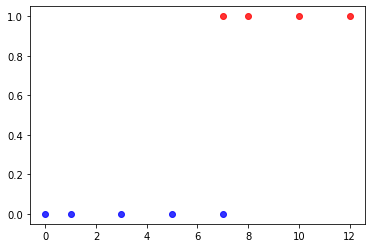

In [85]:
data=[(0,0), (1,0), (3,0), (5,0), (7,0), (7,1), (8,1), (10,1), (12,1)]
xdata=[x for (x,y) in data]
ydata=[y for (x,y) in data]
plt.figure()
for x,y in data:
    if y ==1:
        plt.scatter(x, y, color='red', alpha=.8)
    else:
        plt.scatter(x, y, color='blue', alpha=.8)
fig.show()

# Modèle 

On choisit de modéliser notre classifieur comme une régression logistique basée sur la fonction sigmoïde. Puisque nos données sont représentées sur une seule dimension, nous avons deux paramètres à apprendre, *theta0* et *theta1*.

In [15]:
xs = np.linspace(-12,12,100)

#La sigmoïde telle que décrite dans les livres avec les moins devant tous nos paramètres theta
def h(x, teta0, teta1):
    return 1/(1+math.exp(-teta0 - teta1 * x))

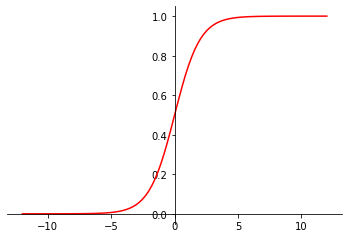

In [16]:
theta0=0
theta1=1
ys = [h(x,theta0,theta1) for x in xs]
fig = plt.figure()
plot(xs,ys)
plt.show()

### Les paramètres du modèle

Que se passe-t-il lorsque l'on modifie *theta0* et *theta1* ?
*theta0* permet de déplacer la sigmoïde sur l'axe des abscisses quant *theta1* modifie *l'inflexion* de la sigmoïde.

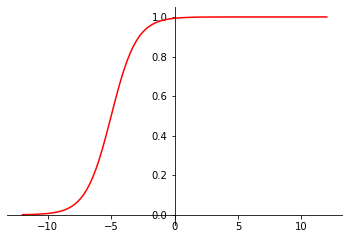

In [17]:
theta0=5
theta1=1
ys = [h(x,theta0,theta1) for x in xs]
fig = plt.figure()
plot(xs,ys)
plt.show()

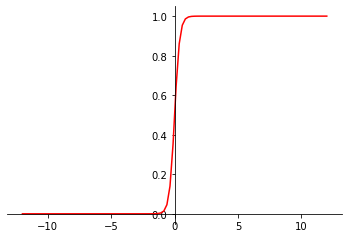

In [18]:
theta0=0
theta1=5
ys = [h(x,theta0,theta1) for x in xs]
fig = plt.figure()
plot(xs,ys)
plt.show()

### *Fitter* le modèle à la main

Une fois que l'on connait l'impact de *theta0* et *theta1*, on peut s'amuser à essayer de trouver nous mêmes ces paramètres comme ci-dessous, avec une régression logistique qui classifierait plutôt bien nos données.

theta0=-7 ; theta1=1

/home/dugue/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


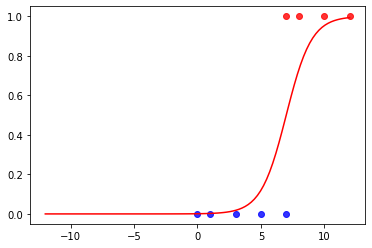

In [86]:
plt.figure()
for x,y in data:
    if y ==1:
        plt.scatter(x, y, color='red', alpha=.8)
    else:
        plt.scatter(x, y, color='blue', alpha=.8)

theta0=-7
theta1=1
ys = [h(x,theta0,theta1) for x in xs]
plot(xs,ys)
plt.show()

# *Fitter*/apprendre automatiquement les paramètres du modèle

### La fonction d'erreur *J*

Tout d'abord, on calcule la fonction d'erreur *jobj* qu'il s'agit de minimiser, puisque c'est une fonction d'erreur. On constate que l'erreur du modèle *fitté* à la main est faible.

theta0=-7 ; theta1=1

In [103]:
import math

def jobj(xdata, ydata, theta0, theta1):
    j=0
    for idx, x in enumerate(xdata):
        sigmo= (h(x,theta0,theta1))
        # Pour éviter les log de 0, c'est clairement nul mais bon....
        if sigmo ==0:
            sigmo+=0.00000001
        if sigmo == 1:
            sigmo-=0.00000001
        j+=ydata[idx] * math.log(sigmo) + (1 - ydata[idx]) * math.log( 1 - sigmo )
    j= -j / len(xdata)
    return j
    
theta0=0
theta1=1
jobj(xdata, ydata, theta0, theta1)

1.8959912722793595

In [104]:
theta0=-7
theta1=1
jobj(xdata, ydata, theta0, theta1)

0.2114804265836956

### Gradient sur *theta0*

En partant de (theta0=0 ; theta1=1), on va apprendra via le gradient le paramètre *theta0* qui converge presque vers *-7*

In [105]:
def deltajtheta0(xdata, ydata, theta0, theta1):
    dj=0
    for idx, x in enumerate(xdata):
        sigmo= (h(x,theta0,theta1))
        dj+=ydata[idx] - sigmo
    return dj/ len(xdata)

#algoGradient
theta0=0
theta1=1
for i in range(100):
    print(theta0, theta1, jobj(xdata,ydata,theta0,theta1))
    theta0=theta0 + deltajtheta0(xdata,ydata,theta0,theta1)

0 1 1.8959912722793595
-0.46385898444062007 1 1.6870432702504006
-0.900471183016673 1 1.502355972774015
-1.3096859874455467 1 1.3402503836383517
-1.692738598321041 1 1.1981893521012124
-2.0514730357843356 1 1.0735320920828462
-2.387780493467797 1 0.9639235524887668
-2.7033468773915006 1 0.8673892927573136
-2.9996150541455693 1 0.7822893852008161
-3.2778302955476373 1 0.7072439217109854
-3.5390864572466194 1 0.6410760223023004
-3.784350173950816 1 0.5827752210937148
-4.01447244125943 1 0.5314708766904466
-4.2302010407442845 1 0.48640829142417336
-4.432199167449415 1 0.44692611992920067
-4.621068162745628 1 0.4124366009037892
-4.797369679485268 1 0.3824101261660131
-4.961643688427674 1 0.35636445496958324
-5.114420976810129 1 0.3338578392473951
-5.256230543280063 1 0.31448489894529547
-5.3876030778622175 1 0.29787415744182716
-5.509071757383366 1 0.28368643609109784
-5.621171297371017 1 0.2716136047857056
-5.724435884181728 1 0.2613774042053596
-5.819396394606678 1 0.2527281905162356
-5.

### Gradient sur *theta0* et *theta1*

En partant de (theta0=0 ; theta1=1), on va apprendra via le gradient les paramètre *theta0* et *theta1*. On obtient une erreur encore plus faible avec cette optimisation ! 

In [106]:
def deltajtheta0(xdata, ydata, theta0, theta1):
    dj=0
    for idx, x in enumerate(xdata):
        sigmo= (h(x,theta0,theta1))
        dj+=ydata[idx] - sigmo
    return dj/ len(xdata)

def deltajtheta1(xdata, ydata, theta0, theta1):
    dj=0
    for idx, x in enumerate(xdata):
        sigmo= (h(x,theta0,theta1))
        dj+=x*(ydata[idx] - sigmo)
    return dj/ len(xdata)


#algoGradient
theta0=0
theta1=1
for i in range(500):
    print(theta0, theta1, jobj(xdata,ydata,theta0,theta1))
    theta0=theta0 + deltajtheta0(xdata,ydata,theta0,theta1)
    # Pas d'apprentissage sur theta1 afin d'éviter de trop se déplacer dans l'espace d'un seul coup
    theta1=theta1 +0.3* deltajtheta1(xdata,ydata,theta0,theta1)


0 1 1.8959912722793595
-0.46385898444062007 0.4889185509930498 0.8584959805970889
-0.8368480699198533 0.09046491536578577 0.5668046031077615
-0.8190970773044763 0.46911168779275947 0.7066744562353535
-1.1466601509085366 0.12142749320608398 0.5356667724894327
-1.1011222427045473 0.5099316772146798 0.669215384159993
-1.4113453434376575 0.16513592228417778 0.49115719215047826
-1.3682103325475465 0.5115889272276052 0.5924152558629601
-1.6481017958422326 0.19895777593618275 0.46189447359171304
-1.6006604871512653 0.5246262466133452 0.5447253593017306
-1.858802606646604 0.23217699373226242 0.43507078790272047
-1.8125041153459338 0.5316147399678766 0.49979389518226003
-2.0486490088134435 0.2631644695821244 0.412147045604181
-2.005154473789979 0.5373573662182387 0.4618916475096295
-2.220927453725105 0.2925990747122704 0.39204289098871564
-2.1818376991984625 0.5416642764045125 0.4293358431561228
-2.3783183985233594 0.32080474778533136 0.3742457301702822
-2.3448957740266585 0.5448269883984026 0.

### L'erreur J en fonction de *theta0* et *theta1*

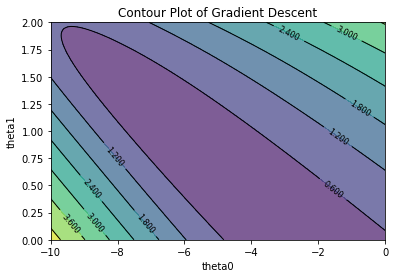

In [123]:
theta0 = np.linspace(-10, 0, 100)
theta1 = np.linspace(0, 2, 100)
j_vals = np.zeros(shape=(theta0.size, theta1.size))
for i, value1 in enumerate(theta0):
    for j, value2 in enumerate(theta1): 
        j_vals[i, j] = jobj(xdata,ydata,value1,value2)
        
plt.contourf(theta0, theta1, j_vals,alpha=.7)
plt.axhline(color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(color='black', alpha=0.5, dashes=[2, 4],linewidth=1) 
CS = plt.contour(theta0, theta1, j_vals, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Contour Plot of Gradient Descent")
plt.xlabel("theta0")
plt.ylabel("theta1")
plt.show()

# Frontière de décision de la régression logistique

## Les données

On commence par générer un jeu de données synthétique avec 2 classes et deux features=attributs x1, x2. Nos données seront ainsi visualisables dans un plan. 
X est donc notre dataset, un tableau 2D de taille (100,2) avec 100 individus (lignes) décrits par deux variables (colonnes). y contient les classes : 0 ou 1.

In [1]:
from sklearn.datasets import make_classification

In [29]:
X,y=make_classification(n_features=2, n_redundant=0, class_sep=5, n_clusters_per_class=1)
X.shape

(100, 2)

La couleur indique la classe ci-dessous, et en abscisse, on a la valeur de l'attribut x1, en ordonnée celle de x2.
On constate qu'on est dans un problème de classification très simple. Les données sont parfaitement séparables !

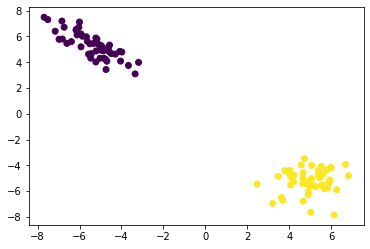

In [30]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

## L'apprentissage de la régression logistique

On sépare ensuite nos données en deux ci-dessous :
- les données d'apprentissage sur lesquelles on apprend le modèle (80% du dataset)
- les données de test sur lesquelles on teste le modèle appris (20% du dataset)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(80, 2)

On lance l'apprentissage de la régression logistique sur le train

In [32]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Puis on lance la prédiction sur le test et on compare les prédictions (y_pred) avec les vraies valeurs des classes (y_test). Et on constate que notre modèle apprend parfaitement à séparer les données.

In [33]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



## Les paramètres appris et la frontière de décision

On essaye donc de faire un plot de la frontière de décision.
Puisqu'on a deux attributs x1 et x2 pour chacune de nos données, on apprend trois paramètres : theta0, theta1 et theta2 qu'on commence par récupérer.

In [34]:
theta1, theta2=clf.coef_[0][0],clf.coef_[0][1]
print(theta1, theta2)
clf.coef_

0.6346310094792443 -0.668575009894253


array([[ 0.63463101, -0.66857501]])

In [35]:
theta0=clf.intercept_[0]
print(theta0)
clf.intercept_

-0.17276934756883042


array([-0.17276935])

### Frontière de décision

La frontière de décision est le résultat de l'équation theta0 + theta1 x1 + theta2 x2 = 0.

Donc pour la tracer, on peut exprimer x2 en fonction de x1:
- theta2 x2 = -theta0 -theta1 x1
- x2 = -(theta0 / theta2) - (theta1/theta2) x1

In [36]:
x1s=[-0.1, 0.1]
x2s=[-(theta1/theta2) * x1 - (theta0 / theta2) for x1 in x1s]
x2s

[-0.35333723968252895, -0.16349137344842535]

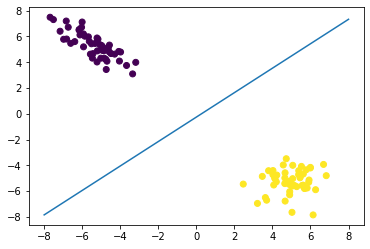

In [39]:
import numpy as np
x = np.linspace(-8, 8, 1000)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.plot(x, -(theta1/theta2) * x - (theta0 / theta2), linestyle='solid')
plt.show()

Nous étions dans un cas de classification très facile donc la frontière de décision est optimale. Mais dans des cas plus difficiles, ça n'est pas le cas, et les SVMs se révèlent alors plus performants.